Data Cleaning and Validation Challenge

1. Determine the five most common journals and the total articles for each
2. Calculate the mean, median, and standard deviation of the open-access cost per article for each journal.
3. For a real bonus round, identify the open access prices paid by subject area.

You will need to do considerable data cleaning in order to extract accurate estimates. You may may want to look into data encoding methods if you get stuck.

Remember not to modify the data directly. Instead, write a cleaning script that will load the raw data and whip it into shape. Jupyter notebooks are a great format for this. Keep a record of your decisions: well-commented code is a must for recording your data cleaning decision-making progress.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load Wellcome Trust APC spending data
apc_df = pd.read_csv('/Users/Lisa/Thinkful_Data_Science_Projects/Module 13/WELLCOME_APCspend2013_forThinkful.csv', encoding='ISO-8859-1')

# Display first 5 rows of apc_df
apc_df.head()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


In [3]:
# Identify and count unique journal titles in Journal title column
apc_df['Journal title'].unique()
print(len(apc_df['Journal title'].unique()))
apc_df['Journal title'].value_counts(sort=True).head(20)

985


PLoS One                                           92
PLoS ONE                                           62
Journal of Biological Chemistry                    48
Nucleic Acids Research                             21
Proceedings of the National Academy of Sciences    19
PLoS Neglected Tropical Diseases                   18
Human Molecular Genetics                           18
Nature Communications                              17
Neuroimage                                         15
PLoS Pathogens                                     15
PLoS Genetics                                      15
Brain                                              14
NeuroImage                                         14
PLOS ONE                                           14
BMC Public Health                                  14
Movement Disorders                                 13
Journal of Neuroscience                            12
Developmental Cell                                 12
Biochemical Journal         

In [4]:
# Clean journal titles
# Replace '&' with 'and'
apc_df['Journal title'] = apc_df['Journal title'].str.replace('&', 'and')

# Change all titles to uppercase
apc_df['Journal title'] = apc_df['Journal title'].str.upper()

# Replace all forms of JBC with 'JBC'
apc_df['Journal title'] = apc_df['Journal title'].str.replace('J BIOL CHEM.', 'JBC')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('J BIOL CHEMISTRY', 'JBC')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('J BIOL CHEMISTRY', 'JBC')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('JBCSTRY', 'JBC')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('JNL BIOLOGICAL CHEMISTRY', 'JBC')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('JOURNAL BIOLOGICAL CHEMISTRY', 'JBC')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('JOURNAL OF BIOL CHEM', 'JBC')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('JOURNAL OF BIOLOGICAL CHEMISTRY', 'JBC')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('BIOLOGICAL CHEMISTRY', 'JBC')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('BIOLOGICIAL CHEMISTRY', 'JBC')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('THE JBC', 'JBC')

# Replace all forms of PNAS with 'PNAS'
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PNAS USA', 'PNAS')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PROC NATL ACAD SCI U S A.', 'PNAS')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PROCEDDINGS OF THE NATIONAL ACADEMY OF SCIENCES OF USA', 'PNAS')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PROCEEDINGS OF THE NATIONAL ACADEMY OF SCIENCES', 'PNAS')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PNAS OF THE USA', 'PNAS')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PNAS OF THE UNITED STATES OF AMERICA', 'PNAS')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PNAS \(PNAS\)', 'PNAS')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PNAS \(PNAS', 'PNAS')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('NATIONAL ACADEMY OF SCIENCES', 'PNAS')

# Replace all forms of PLOS ONE with 'PLOS ONE'
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PLOSONE', 'PLOS ONE')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PLOS 1', 'PLOS ONE')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PLOS  ONE', 'PLOS ONE')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('PONE-D12-17947', 'PLOS ONE')
apc_df.iloc[1345][2] = 'PLOS ONE'
apc_df.iloc[1346][2] = 'PLOS ONE'
apc_df.iloc[1347][2] = 'PLOS ONE'
apc_df.iloc[1348][2] = 'PLOS ONE'

# Replace all forms of Nucleic Acids Research with 'Nucleic Acids Research'
apc_df['Journal title'] = apc_df['Journal title'].str.replace('NUCLEIC ACID RESEARCH', 'NUCLEIC ACIDS RESEARCH')

# Replace all forms of NeuroImage with 'NeuroImage'
apc_df['Journal title'] = apc_df['Journal title'].str.replace('NEUROLMAGE', 'NEUROIMAGE')
apc_df['Journal title'] = apc_df['Journal title'].str.replace('NEUROIMAGE: CLINICAL', 'NI CLINICAL')

# Strip whitespaces
apc_df['Journal title'] = apc_df['Journal title'].str.strip()

print(len(apc_df['Journal title'].unique()))

858


In [5]:
# Five most common journals and total articles for each
jbc_count = apc_df['Journal title'].str.contains('JBC').value_counts()[True]
pnas_count = apc_df['Journal title'].str.contains('PNAS').value_counts()[True]
plosone_count = apc_df['Journal title'].str.contains('PLOS ONE').value_counts()[True]
nar_count = apc_df['Journal title'].str.contains('NUCLEIC ACIDS RESEARCH').value_counts()[True]
ni_count = apc_df['Journal title'].str.contains('NEUROIMAGE').value_counts()[True]

print('There are {} PLOS One articles.'.format(plosone_count))
print('There are {} JBC articles.'.format(jbc_count))
print('There are {} PNAS articles.'.format(pnas_count))
print('There are {} NeuroImage articles.'.format(ni_count))
print('There are {} Nucleic Acids Research articles.'.format(nar_count))

There are 212 PLOS One articles.
There are 73 JBC articles.
There are 40 PNAS articles.
There are 31 NeuroImage articles.
There are 29 Nucleic Acids Research articles.


In [6]:
# Double check new counts
apc_df['Journal title'].value_counts(sort=True).head(20)

PLOS ONE                            212
JBC                                  73
PNAS                                 40
NEUROIMAGE                           31
NUCLEIC ACIDS RESEARCH               29
PLOS GENETICS                        24
PLOS PATHOGENS                       24
PLOS NEGLECTED TROPICAL DISEASES     20
HUMAN MOLECULAR GENETICS             19
NATURE COMMUNICATIONS                19
MOVEMENT DISORDERS                   15
BRAIN                                14
BMC PUBLIC HEALTH                    14
JOURNAL OF NEUROSCIENCE              13
DEVELOPMENTAL CELL                   12
BIOCHEMICAL JOURNAL                  12
CURRENT BIOLOGY                      11
JOURNAL OF GENERAL VIROLOGY          11
BMJ                                  10
MALARIA JOURNAL                      10
Name: Journal title, dtype: int64

In [7]:
# Convert cost data to floats
apc_df['COST (£) charged to Wellcome (inc VAT when charged)'] = apc_df['COST (£) charged to Wellcome (inc VAT when charged)'].str.replace('£', '')
apc_df['COST (£) charged to Wellcome (inc VAT when charged)'] = apc_df['COST (£) charged to Wellcome (inc VAT when charged)'].str.replace('$', '')
apc_df['COST (£) charged to Wellcome (inc VAT when charged)'] = apc_df['COST (£) charged to Wellcome (inc VAT when charged)'].astype(float)
print(apc_df.dtypes)

# Drop costs above £10,000, seem to be typos or placeholder values
apc_df.drop(apc_df[apc_df['COST (£) charged to Wellcome (inc VAT when charged)'] > 10000].index, inplace=True)

# Make data frames for each of the top 5 journals
plosone_df = apc_df[apc_df['Journal title'].str.contains('PLOS ONE', na=False)]
jbc_df = apc_df[apc_df['Journal title'].str.contains('JBC', na=False)]
pnas_df = apc_df[apc_df['Journal title'].str.contains('PNAS', na=False)]
ni_df = apc_df[apc_df['Journal title'].str.contains('NEUROIMAGE', na=False)]
nar_df = apc_df[apc_df['Journal title'].str.contains('NUCLEIC ACIDS RESEARCH', na=False)]

PMID/PMCID                                              object
Publisher                                               object
Journal title                                           object
Article title                                           object
COST (£) charged to Wellcome (inc VAT when charged)    float64
dtype: object


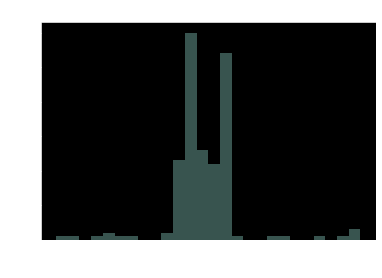

The mean cost per article for PLOS One is £937.01.
The median cost per article for PLOS One is £897.4.
The standard deviation of cost per article for PLOS One is £193.58.


In [19]:
# Plot cost for PLOS One data frame
sns.distplot(plosone_df['COST (£) charged to Wellcome (inc VAT when charged)'],
             kde=False)

plt.ylabel('Counts')
plt.title('PLOS One')
plt.show()

# Calculate mean, median, and standard deviation for PLOS One
plosone_mean = round(plosone_df['COST (£) charged to Wellcome (inc VAT when charged)'].mean(), 2)
plosone_median = round(plosone_df['COST (£) charged to Wellcome (inc VAT when charged)'].median(), 2)
plosone_std = round(plosone_df['COST (£) charged to Wellcome (inc VAT when charged)'].std(), 2)

print('The mean cost per article for PLOS One is £{}.'.format(plosone_mean))
print('The median cost per article for PLOS One is £{}.'.format(plosone_median))
print('The standard deviation of cost per article for PLOS One is £{}.'.format(plosone_std))

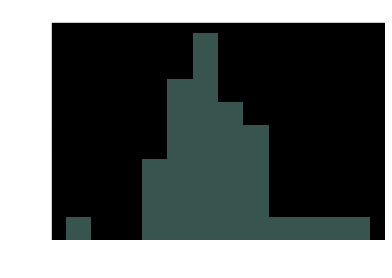

The mean cost per article for JBC is £1378.14.
The median cost per article for JBC is £1311.73.
The standard deviation of cost per article for JBC is £388.55.


In [21]:
# Plot cost for JBC data frame
sns.distplot(jbc_df['COST (£) charged to Wellcome (inc VAT when charged)'],
             kde=False)

plt.ylabel('Counts')
plt.title('JBC')
plt.show()

# Calculate mean, median, and standard deviation for JBC
jbc_mean = round(jbc_df['COST (£) charged to Wellcome (inc VAT when charged)'].mean(), 2)
jbc_median = round(jbc_df['COST (£) charged to Wellcome (inc VAT when charged)'].median(), 2)
jbc_std = round(jbc_df['COST (£) charged to Wellcome (inc VAT when charged)'].std(), 2)

print('The mean cost per article for JBC is £{}.'.format(jbc_mean))
print('The median cost per article for JBC is £{}.'.format(jbc_median))
print('The standard deviation of cost per article for JBC is £{}.'.format(jbc_std))

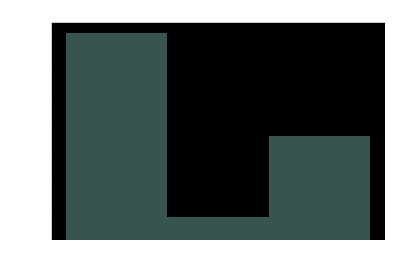

The mean cost per article for Nucleic Acids Research is £1162.34.
The median cost per article for Nucleic Acids Research is £852.0.
The standard deviation of cost per article for Nucleic Acids Research is £442.15.


In [22]:
# Plot cost for NAR data frame
sns.distplot(nar_df['COST (£) charged to Wellcome (inc VAT when charged)'],
             kde=False)

plt.ylabel('Counts')
plt.title('Nucleic Acids Research')
plt.show()

# Calculate mean, median, and standard deviation for NAR
nar_mean = round(nar_df['COST (£) charged to Wellcome (inc VAT when charged)'].mean(), 2)
nar_median = round(nar_df['COST (£) charged to Wellcome (inc VAT when charged)'].median(), 2)
nar_std = round(nar_df['COST (£) charged to Wellcome (inc VAT when charged)'].std(), 2)

print('The mean cost per article for Nucleic Acids Research is £{}.'.format(nar_mean))
print('The median cost per article for Nucleic Acids Research is £{}.'.format(nar_median))
print('The standard deviation of cost per article for Nucleic Acids Research is £{}.'.format(nar_std))

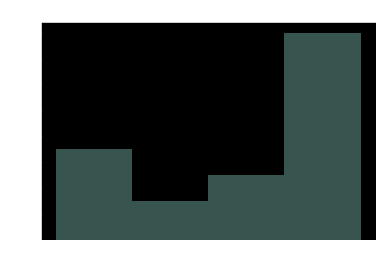

The mean cost per article for NeuroImage is £2212.18.
The median cost per article for NeuroImage is £2326.43.
The standard deviation of cost per article for NeuroImage is £273.19.


In [23]:
# Plot cost for NeuroImage data frame
sns.distplot(ni_df['COST (£) charged to Wellcome (inc VAT when charged)'],
             kde=False)

plt.ylabel('Counts')
plt.title('NeuroImage')
plt.show()

# Calculate mean, median, and standard deviation for NeuroImage
ni_mean = round(ni_df['COST (£) charged to Wellcome (inc VAT when charged)'].mean(), 2)
ni_median = round(ni_df['COST (£) charged to Wellcome (inc VAT when charged)'].median(), 2)
ni_std = round(ni_df['COST (£) charged to Wellcome (inc VAT when charged)'].std(), 2)

print('The mean cost per article for NeuroImage is £{}.'.format(ni_mean))
print('The median cost per article for NeuroImage is £{}.'.format(ni_median))
print('The standard deviation of cost per article for NeuroImage is £{}.'.format(ni_std))

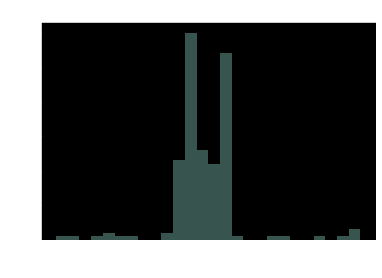

The mean cost per article for PNAS is £839.88.
The median cost per article for PNAS is £734.0.
The standard deviation of cost per article for PNAS is £455.32.


In [24]:
# Plot cost for PNAS data frame
sns.distplot(plosone_df['COST (£) charged to Wellcome (inc VAT when charged)'],
             kde=False)

plt.ylabel('Counts')
plt.title('PNAS')
plt.show()

# Calculate mean, median, and standard deviation for PNAS
pnas_mean = round(pnas_df['COST (£) charged to Wellcome (inc VAT when charged)'].mean(), 2)
pnas_median = round(pnas_df['COST (£) charged to Wellcome (inc VAT when charged)'].median(), 2)
pnas_std = round(pnas_df['COST (£) charged to Wellcome (inc VAT when charged)'].std(), 2)

print('The mean cost per article for PNAS is £{}.'.format(pnas_mean))
print('The median cost per article for PNAS is £{}.'.format(pnas_median))
print('The standard deviation of cost per article for PNAS is £{}.'.format(pnas_std))